In [124]:
# We import the necessary packages
#import the needed packages

import os,argparse
import pytesseract
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
#from sklearn.datasets import fetch_openml

In [125]:
img = cv2.imread('image.jpg')

In [127]:
# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(X_train,y_train), (X_test, y_test) = mnist.load_data()

In [128]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from 'd:\\Assignment Varpas\\Project Code OCR  IMage\\venv\\lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\mnist\\__init__.py'>

In [129]:
# reshape images to specify that it's a single channel
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

In [130]:
import random

In [131]:
# Select a subset of images (e.g., 100)
num_images = 100
selected_indices = random.sample(range(len(X_train)), num_images)
subset_images = X_train[selected_indices]

In [132]:
# Function to add random noise to images
def add_noise(image, noise_level=0.2):
    noisy_image = image + noise_level * np.random.normal(size=image.shape)
    noisy_image = np.clip(noisy_image, 0, 1)  # Ensure pixel values are within [0, 1]
    return noisy_image

In [133]:
# Introduce noise to the subset of images
noisy_images = [add_noise(image) for image in subset_images]

In [139]:
noisy_images

[array([[9.79677699e-02, 3.02968929e-01, 3.99441537e-01, 1.74651361e-01,
         0.00000000e+00, 0.00000000e+00, 2.20871772e-01, 0.00000000e+00,
         1.57967728e-01, 9.01644862e-02, 1.94706162e-01, 2.30206762e-02,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.89123297e-02,
         1.99360952e-01, 1.59490392e-02, 4.09331603e-01, 0.00000000e+00,
         1.28200619e-01, 6.03433660e-02, 0.00000000e+00, 1.33766594e-01,
         0.00000000e+00, 0.00000000e+00, 2.59949713e-01, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 2.00848728e-02, 8.16542815e-02,
         0.00000000e+00, 0.00000000e+00, 2.41323989e-01, 1.88750640e-01,
         5.42515355e-02, 1.59347475e-01, 6.61038590e-02, 0.00000000e+00,
         6.67003989e-02, 0.00000000e+00, 3.34778222e-01, 1.37139448e-02,
         1.96395572e-01, 0.00000000e+00, 9.13667849e-03, 4.92086440e-01,
         0.00000000e+00, 0.00000000e+00, 2.41092762e-01, 2.47479642e-03,
         3.81400715e-03, 0.00000000e+00, 2.6343831

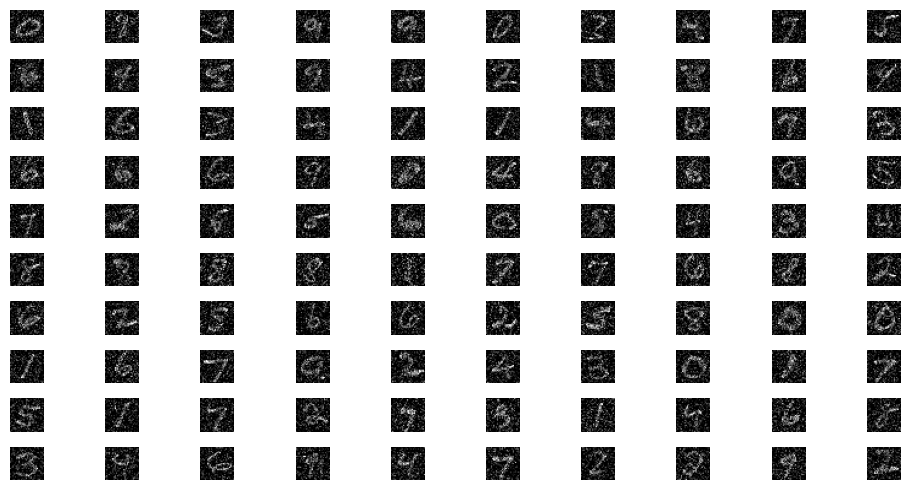

In [134]:
# Display original and noisy images
plt.figure(figsize=(10, 5))
for i in range(num_images):
    plt.subplot(10, 10, i + 1)
    plt.imshow(noisy_images[i], cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [142]:
def is_noisy(image_path, threshold=30):
    try:
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if image is None:
            return False  # Unable to read the image

        std_deviation = image.std()
        return std_deviation > threshold
    except Exception as e:
        print(f"Error processing {image_path}: {str(e)}")
        return False

In [155]:
# Define the path to the directory containing the images
image_dir = "D:\Assignment Varpas\Dataset"

In [152]:
# Define a threshold for standard deviation to classify images as noisy
threshold_value = 30

In [156]:
# List of noisy images
noisy_images = []

In [157]:
# Iterate through the images in the directory
for filename in os.listdir(image_dir):
    if filename.endswith(('.jpg', '.png', '.jpeg', '.bmp', '.gif')):  # Add more extensions if needed
        image_path = os.path.join(image_dir, filename)
        if is_noisy(image_path, threshold_value):
            noisy_images.append(filename)


In [158]:
# Print the list of noisy images
if noisy_images:
    print("Noisy images detected:")
    for noisy_image in noisy_images:
        print(noisy_image)
else:
    print("No noisy images found.")

No noisy images found.


In [136]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)


In [138]:
#image = cv2.imread('aurebesh.jpg')
#gray = get_grayscale(image)
#thresh = thresholding(gray)
#opening = opening(gray)
#canny = canny(gray)

In [180]:
# Function to perform OCR on an image
def perform_ocr(image):
    # Convert the image to a format suitable for OCR (e.g., grayscale)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Perform OCR using pytesseract
    text = pytesseract.image_to_string(gray_image, config='--psm 10 --oem 3')
     # Extract digits from the recognized text (assuming they are separated by spaces)
    recognized_digits = [int(digit) for digit in text.split() if digit.isdigit()]
    return recognized_digits
# Perform OCR on the noisy images
recognized_digit_lists = [perform_ocr(image) for image in noisy_images]

# Flatten the recognized digits into a single list
recognized_digits = [digit for digit_list in recognized_digit_lists for digit in digit_list]

# Calculate accuracy by comparing recognized digits with ground truth
ground_truth_digits = [y_train[i] for i in selected_indices]
accuracy = accuracy_score(ground_truth_digits, recognized_digits)

NameError: name 'accuracy_score' is not defined

In [166]:
import matplotlib.pyplot as plt

# Sample ground truth and predicted labels
ground_truth = ['3', '9', '3', '0', '8', '1', '0', '4', '9', '6']
predicted_labels = ['5', '4', '6', '2', '0', '1', '8', '9', '9', '6']

In [167]:
# Create a list of misclassified indices
misclassified_indices = [i for i in range(len(ground_truth)) if ground_truth[i] != predicted_labels[i]]

In [168]:
# Create a list of misclassified digits based on the misclassified indices
misclassified_digits = [ground_truth[i] for i in misclassified_indices]

In [169]:
# Calculate the distribution of misclassified digits
misclassified_distribution = {digit: misclassified_digits.count(digit) for digit in set(misclassified_digits)}

In [173]:
# Sort the distribution by digit
sorted_misclassified_distribution = dict(sorted(misclassified_distribution.items()))
print(sorted_misclassified_distribution)

{'0': 2, '3': 2, '4': 1, '8': 1, '9': 1}


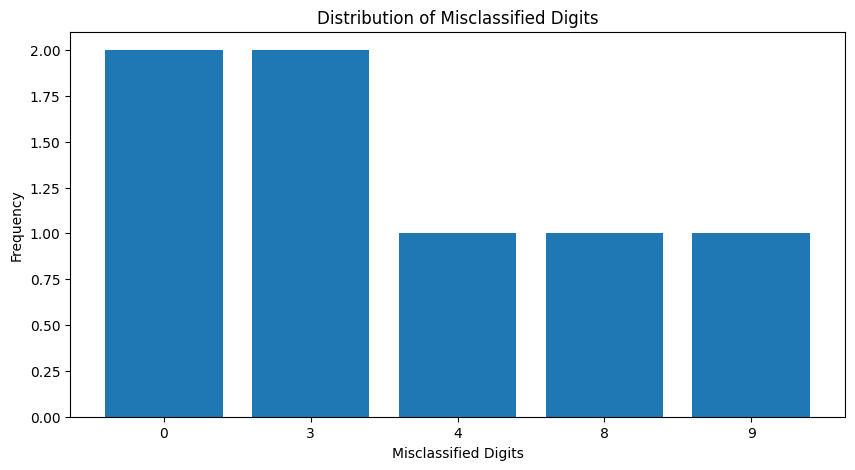

In [171]:
# Create a bar chart to visualize the distribution of misclassified digits
plt.figure(figsize=(10, 5))
plt.bar(sorted_misclassified_distribution.keys(), sorted_misclassified_distribution.values())
plt.xlabel('Misclassified Digits')
plt.ylabel('Frequency')
plt.title('Distribution of Misclassified Digits')
plt.xticks(rotation=0)
plt.show()

In [175]:
# Create a dictionary to store misclassification counts for each digit
misclassification_counts = {digit: 0 for digit in set(ground_truth)}


In [176]:
# Iterate through the labels to count misclassifications
for true_label, predicted_label in zip(ground_truth, predicted_labels):
    if true_label != predicted_label:
        misclassification_counts[true_label] += 1

In [177]:
# Calculate the misclassification rate for each digit
misclassification_rates = {digit: count / ground_truth.count(digit) for digit, count in misclassification_counts.items()}

In [178]:
# Sort the misclassification rates by digit
sorted_misclassification_rates = dict(sorted(misclassification_rates.items()))

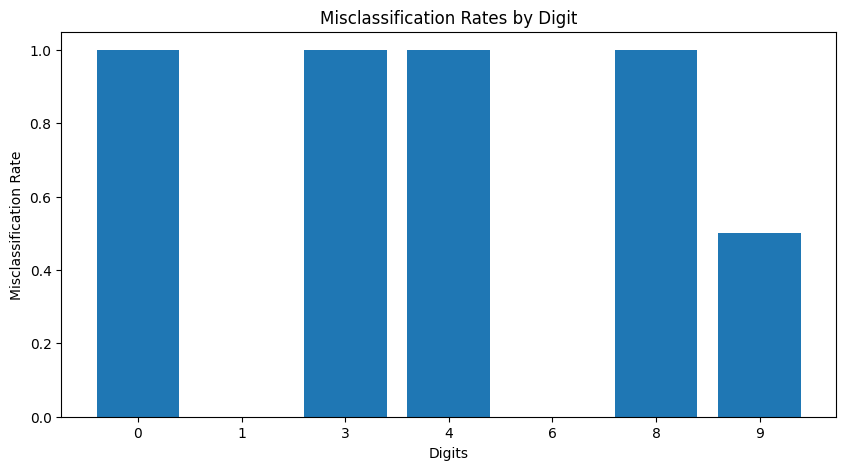

In [179]:
# Create a bar chart to visualize misclassification rates
plt.figure(figsize=(10, 5))
plt.bar(sorted_misclassification_rates.keys(), sorted_misclassification_rates.values())
plt.xlabel('Digits')
plt.ylabel('Misclassification Rate')
plt.title('Misclassification Rates by Digit')
plt.xticks(rotation=0)
plt.show()